## KarpovCourses. Продуктовая аналитика 
### Сегментация клиентов в Python 
 
### RFM-анализ

In [1]:
import pandas as pd
import numpy as np


# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'viridis'

In [ ]:
orders = pd.read_csv('ret.csv')


In [56]:
last_date = orders.InvoiceDate.max()
last_date

Timestamp('2010-12-09 20:01:00')

In [62]:
rfmTable = orders.groupby('Customer ID').agg({'InvoiceDate': lambda x: (last_date - x.max()).days, # Recency #Количество дней с последнего заказа
                                        'Invoice': lambda x: len(x),      # Frequency #Количество заказов
                                        'InvoiceTotal': lambda x: x.sum()}) # Monetary Value #Общая сумма по всем заказам

rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'Invoice': 'frequency', 
                         'InvoiceTotal': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
Customer ID,,,
12346.0,164,33,372.86
12347.0,2,71,1323.32
12348.0,73,20,222.16
12349.0,42,102,2671.14
12351.0,10,21,300.93


In [63]:
rfmSegmentation = rfmTable


In [72]:

def RClass(value,parameter_name,quantiles):
    if value <= quantiles[0]:
        return 1
    elif value <= quantiles[1]:
        return 2
    elif value <= quantiles[2]:
        return 3
    else:
        return 4


def FMClass(value, parameter_name,quantiles):
    if value <= quantiles[0]:
        return 4
    elif value <= quantiles[1]:
        return 3
    elif value <= quantiles[2]: 
        return 2
    else:
        return 1


In [67]:
list1 = [0.25, 0.5, 0.75]
rq = []
fq = []
mq = []
for x in list1:
    rq.append(rfmSegmentation['recency'].quantile(x)) 
    fq.append(rfmSegmentation['frequency'].quantile(x))
    mq.append(rfmSegmentation['monetary_value'].quantile(x))
print(rq, fq, mq)

[17.0, 52.0, 135.0] [18.0, 44.0, 102.0] [307.9875, 706.02, 1723.1425]


In [73]:

rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency', rq))

rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency', fq))

rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value', mq))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str)                             + rfmSegmentation.F_Quartile.map(str)                             + rfmSegmentation.M_Quartile.map(str)

In [75]:
pd.crosstab(index = rfmSegmentation.R_Quartile, columns = rfmSegmentation.F_Quartile)

F_Quartile,1,2,3,4
R_Quartile,,,,
1,527,289,166,107
2,323,304,265,209
3,176,292,303,275
4,49,175,347,505


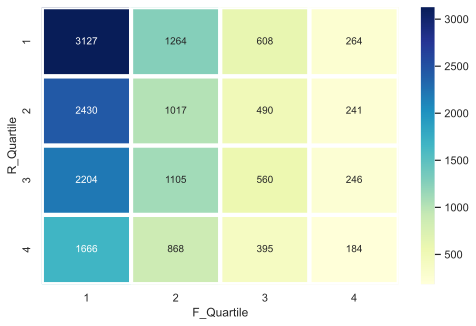

In [77]:
rfm_table = rfmSegmentation.pivot_table(
                        index='R_Quartile', 
                        columns='F_Quartile', 
                        values='monetary_value', 
                        aggfunc=np.median).applymap(int)
sns.heatmap(rfm_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=4.15, annot_kws={"size": 10});